Achmad Nurnaafi

1306621057

UTS Kapita Selekta Fisika Komputasi

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
data1 = pd.read_csv('sensorgas1.csv')
data2 = pd.read_csv('sensorgas2.csv')

# Data Exploration

## Sensor Gas 1

In [8]:
data1

,time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,T,H
0,0.1,1972.750,746.500,1410.625,1665.875,1769.125,2429.625,249.875,1396.625,1885.625,1492.250,35.96,42.22
1,0.2,1972.750,746.500,1410.625,1666.500,1769.375,2429.750,250.000,1397.500,1886.250,1493.125,35.96,42.19
2,0.3,1972.875,746.625,1410.625,1667.000,1769.625,2429.875,249.875,1398.375,1886.875,1494.125,35.96,42.19
3,0.4,1973.000,746.625,1410.625,1667.625,1769.875,2430.000,250.000,1399.250,1887.500,1495.000,35.95,42.22
4,0.5,1973.125,746.500,1410.625,1668.250,1770.000,2430.000,249.875,1400.125,1888.125,1495.875,35.99,42.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,29.6,3249.875,916.125,1414.250,3098.625,2326.750,2829.625,269.250,3683.500,3592.625,3573.875,35.97,44.82
296,29.7,3248.375,916.375,1414.375,3094.875,2322.375,2827.125,269.375,3681.125,3590.750,3570.375,36.00,44.82
297,29.8,3246.750,916.625,1414.375,3091.000,2318.125,2824.750,269.250,3678.625,3588.750,3566.750,36.00,44.82
298,29.9,3245.125,917.000,1414.375,3087.125,2313.875,2822.250,269.375,3676.125,3586.875,3563.250,35.97,44.80


In [9]:
data1.describe()

,time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,T,H
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15.050000,2571.199583,805.355833,1411.480000,2571.642083,2231.581250,2742.94250,260.012500,2739.610833,2856.395417,2782.134167,35.991500,43.648267
std,8.674676,578.150605,63.867642,1.571663,760.919976,413.000253,274.81879,9.047167,1131.074333,828.556675,1048.015526,0.016843,1.421816
min,0.100000,1972.750000,746.500000,1409.375000,1665.875000,1768.625000,2428.62500,249.625000,1396.625000,1885.625000,1492.250000,35.950000,41.970000
25%,7.575000,1979.593750,747.125000,1410.500000,1700.218750,1771.968750,2430.50000,249.875000,1436.593750,1907.875000,1525.468750,35.990000,42.200000
50%,15.050000,2444.750000,775.000000,1410.750000,3092.937500,2346.250000,2843.00000,261.875000,3630.875000,3329.937500,3568.562500,35.990000,43.640000
75%,22.525000,3247.156250,869.500000,1413.000000,3296.687500,2637.625000,3009.12500,269.625000,3795.375000,3657.250000,3737.281250,36.000000,45.125000
max,30.000000,3288.250000,917.250000,1414.375000,3373.375000,2785.000000,3096.12500,270.375000,3840.750000,3698.000000,3794.500000,36.030000,45.420000


## Sensor Gas 2

In [10]:
data2

,time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,T,H
0,0.0,1978.500,769.375,1436.125,1715.625,1819.750,2475.500,242.375,1326.375,1946.250,1557.875,36.96,43.70
1,0.1,1978.625,769.500,1436.125,1716.125,1819.750,2475.625,242.500,1326.750,1946.375,1558.000,36.99,43.71
2,0.2,1978.750,769.500,1436.125,1716.500,1819.750,2475.625,242.625,1327.250,1946.625,1558.250,36.97,43.74
3,0.3,1978.875,769.500,1436.125,1716.875,1819.875,2475.500,242.625,1327.625,1946.625,1558.500,36.97,43.74
4,0.4,1979.000,769.500,1436.125,1717.375,1819.875,2475.625,242.625,1328.000,1946.750,1558.625,36.96,43.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,29.6,3416.875,1043.875,1442.625,3279.625,2580.875,2963.250,269.875,3790.875,3723.625,3751.250,37.02,44.50
297,29.7,3415.125,1044.500,1442.625,3276.250,2575.750,2960.500,269.750,3789.000,3721.875,3748.625,37.00,44.51
298,29.8,3413.375,1045.000,1442.625,3273.000,2570.750,2957.625,269.750,3787.250,3720.250,3746.125,37.05,44.50
299,29.9,3411.500,1045.375,1442.750,3269.625,2565.500,2954.875,269.750,3785.375,3718.625,3743.500,37.02,44.48


In [11]:
data2.describe()

,time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,T,H
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,15.000000,2703.837625,863.615864,1438.166113,2699.569767,2417.031146,2857.204734,255.839701,2772.065199,2966.912375,2897.994601,37.001296,44.117575
std,8.703543,676.313586,102.737004,2.639370,822.341073,525.834359,334.391386,12.144990,1219.878540,872.175682,1095.573459,0.017644,0.694290
min,0.000000,1978.500000,769.375000,1435.375000,1715.625000,1811.375000,2467.500000,242.250000,1326.375000,1946.250000,1554.000000,36.960000,43.080000
25%,7.500000,1983.750000,770.500000,1436.125000,1725.875000,1818.375000,2473.875000,242.500000,1336.000000,1948.750000,1560.125000,36.990000,43.490000
50%,15.000000,2694.625000,814.375000,1436.250000,3289.625000,2611.875000,2986.375000,256.875000,3785.375000,3572.750000,3751.250000,37.000000,43.880000
75%,22.500000,3440.500000,965.625000,1441.000000,3458.625000,2931.875000,3179.250000,269.250000,3878.750000,3786.875000,3868.375000,37.020000,44.820000
max,30.000000,3483.625000,1045.875000,1442.750000,3518.250000,3073.625000,3274.500000,270.375000,3910.375000,3819.750000,3906.375000,37.050000,45.100000


Dari tabel statistik yang telah dihasilkan, kita dapat membuat beberapa analisis sebagai berikut:

1. **Nilai Minimum:**
   - Gas 1 memiliki nilai minimum terendah untuk waktu sekitar 0.10, sedangkan Gas 2 memiliki nilai minimum waktu sebesar 0.00. Ini menunjukkan bahwa Gas 2 memiliki beberapa pembacaan awal yang lebih rendah daripada Gas 1.
   - Untuk sensor gas (F), Gas 1 memiliki nilai minimum tertinggi pada sensor F6 (2428.625) dan terendah pada sensor F7 (249.625), sedangkan Gas 2 memiliki nilai minimum tertinggi pada sensor F6 (2467.500) dan terendah pada sensor F7 (242.250). Dalam hal ini, Gas 2 memiliki nilai minimum yang sedikit lebih tinggi daripada Sensor Gas 1 pada beberapa sensor F.
   - Gas 1 memiliki nilai minimum temperatur (T) sekitar 35.950, sedangkan Gas 2 memiliki nilai minimum temperatur sekitar 36.960. Gas 2 memiliki nilai minimum temperatur yang sedikit lebih tinggi.
   - Gas 1 memiliki nilai minimum kelembaban (H) sekitar 41.970, sementara Gas 2 memiliki nilai minimum kelembaban sekitar 43.080. Gas 2 juga memiliki nilai minimum kelembaban yang sedikit lebih tinggi.

2. **Nilai Maksimum:**
   - Gas 1 dan Gas 2 memiliki nilai maksimum waktu yang sama, yaitu 30.00.
   - Gas 1 memiliki nilai maksimum tertinggi pada sensor F8 (3840.750) dan terendah pada sensor F7 (270.375), sedangkan Gas 2 memiliki nilai maksimum tertinggi pada sensor F8 (3910.375) dan terendah pada sensor F7 (270.375). Gas 2 memiliki nilai maksimum yang sedikit lebih tinggi pada beberapa sensor F.
   - Gas 1 memiliki nilai maksimum temperatur (T) sekitar 36.030, sementara Gas 2 memiliki nilai maksimum temperatur sekitar 37.050. Gas 2 memiliki nilai maksimum temperatur yang lebih tinggi.
   - Gas 1 memiliki nilai maksimum kelembaban (H) sekitar 45.420, sementara Gas 2 memiliki nilai maksimum kelembaban sekitar 45.100. Gas 1 memiliki nilai maksimum kelembaban yang sedikit lebih tinggi.

3. **Standar Deviasi:**
   - Gas 1 memiliki standar deviasi waktu sekitar 8.674, sedangkan Gas 2 memiliki standar deviasi waktu sekitar 8.703. Kedua sensor memiliki standar deviasi yang hampir sama untuk waktu.
   - Gas 1 memiliki standar deviasi tertinggi pada sensor F8 (1131.0743) dan terendah pada sensor F3 (1.571), sedangkan Gas 2 memiliki standar deviasi tertinggi pada sensor F8 (1219.878) dan terendah pada sensor F3 (2.639). Gas 2 memiliki standar deviasi yang sedikit lebih tinggi pada beberapa sensor F.
   - Gas 1 memiliki standar deviasi temperatur (T) sekitar 0.016, sedangkan Gas 2 memiliki standar deviasi temperatur sekitar 0.017. Standar deviasi temperatur keduanya hampir sama.
   - Gas 1 memiliki standar deviasi kelembaban (H) sekitar 1.421, sementara Gas 2 memiliki standar deviasi kelembaban sekitar 0.694. Gas 1 memiliki standar deviasi kelembaban yang lebih tinggi.

4. **Rata-rata:**
   - Rata-rata waktu Gas 1 adalah sekitar 15.050, sedangkan rata-rata waktu Gas 2 adalah sekitar 15.00. Keduanya memiliki rata-rata waktu yang hampir sama.
   - Gas 1 memiliki rata-rata tertinggi pada sensor F9 (2856.395) dan terendah pada sensor F7 (260.012), sedangkan Gas 2 memiliki rata-rata tertinggi pada sensor F9 (2966.912) dan terendah pada sensor F7 (255.839). Gas 2 memiliki rata-rata yang sedikit lebih tinggi pada beberapa sensor F.
   - Rata-rata temperatur (T) Gas 1 adalah sekitar 35.991, sedangkan rata-rata temperatur Gas 2 adalah sekitar 37.001. Gas 2 memiliki rata-rata temperatur yang lebih tinggi.
   - Rata-rata kelembaban (H) Gas 1 adalah sekitar 43.648, sementara rata-rata kelembaban Gas 2 adalah sekitar 44.117. Gas 2 memiliki rata-rata kelembaban yang sedikit lebih tinggi.

Dalam analisis ini, Gas 2 cenderung memiliki nilai minimum yang sedikit lebih tinggi, nilai maksimum yang sedikit lebih tinggi, standar deviasi yang lebih tinggi pada beberapa parameter, dan rata-rata yang sedikit lebih tinggi dibandingkan dengan Gas 1. Namun, perbedaan ini mungkin tidak signifikan dan sangat tergantung pada konteks aplikasi sensor tersebut.

# Visualisasi Data

## Sensor Gas 1

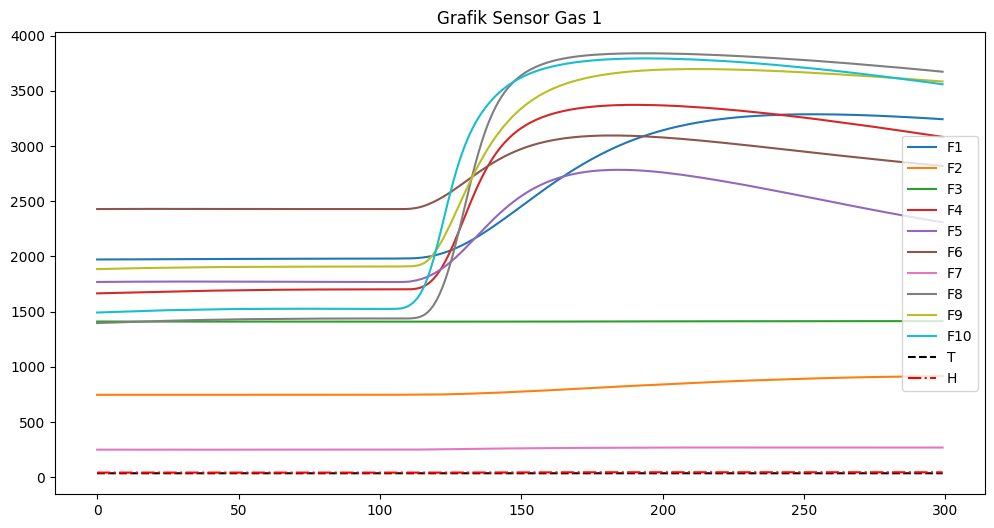

In [12]:
plt.figure(figsize=(12,6))
for i in range(1, 11):
    sensor_gas1 = f'F{i}'
    plt.plot(data1[sensor_gas1], label=sensor_gas1)
plt.plot(data1['T'], label='T', linestyle='--', color='k')
plt.plot(data1['H'], label='H', linestyle='-.', color='r')
plt.title('Grafik Sensor Gas 1')
plt.legend()
plt.show()


## Sensor Gas 2

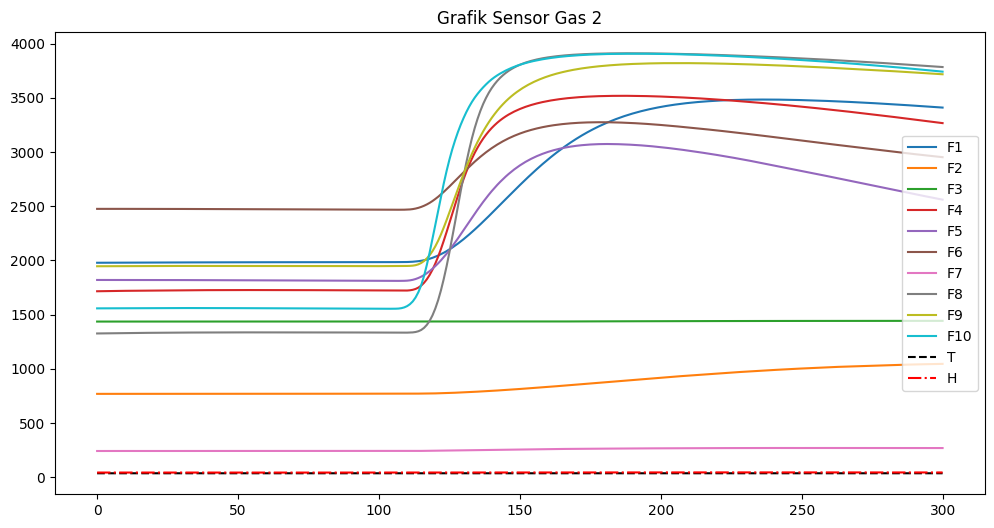

In [13]:
plt.figure(figsize=(12,6))
for i in range(1, 11):
    sensor_gas2 = f'F{i}'
    plt.plot(data2[sensor_gas2], label=sensor_gas2)
plt.plot(data2['T'], label='T', linestyle='--', color='k')
plt.plot(data2['H'], label='H', linestyle='-.', color='r')
plt.title('Grafik Sensor Gas 2')
plt.legend()
plt.show()

# Curve Fitting dengan Polinomial

In [14]:
time = data1["time"]
sensor_F1 = data1["F1"]

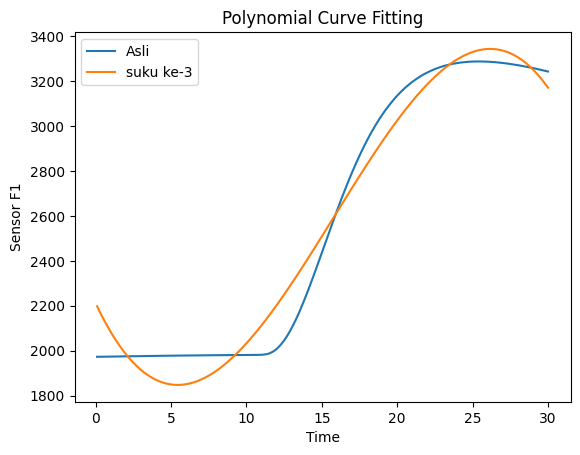

MSE (suku ke-3): 9540.224510668935
R^2 (suku ke-3): 0.971363054517947


In [15]:
f_poly3 = np.polyfit(time, sensor_F1, 3)
suku_3 = np.poly1d(f_poly3)
data_X3 = suku_3(time)

plt.plot(time, sensor_F1, label='Asli')
plt.plot(time, data_X3, label='suku ke-3')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sensor F1')
plt.title('Polynomial Curve Fitting')
plt.show()

prediksi_X3 = suku_3(time)
mse_X3 = mean_squared_error(sensor_F1, prediksi_X3)
r2_X3 = r2_score(sensor_F1, prediksi_X3)
print("MSE (suku ke-3):", mse_X3)
print("R^2 (suku ke-3):", r2_X3)

a.  dari hasil yang diperoleh menunjukkan bahwa model dengan suku ke-3 memiliki Mean Squared Error (MSE) sekitar 9540.22 dan nilai R-squared (R^2) sekitar 0.9714. Model ini dapat dianggap cukup akurat, mengingat R^2 yang tinggi.

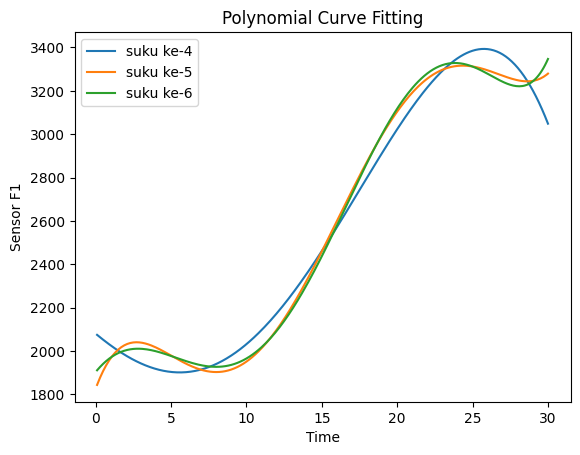

MSE (suku ke-4): 7743.505173528499
R^2 (suku ke-4): 0.9767562770408239

MSE (suku ke-5): 2387.862109403051
R^2 (suku ke-5): 0.9928323408983548

MSE (suku ke-6): 1985.4964476417774
R^2 (suku ke-6): 0.9940401241645475


In [16]:
f_poly4 = np.polyfit(time, sensor_F1, 4)
f_poly5 = np.polyfit(time, sensor_F1, 5)
f_poly6 = np.polyfit(time, sensor_F1, 6)

suku_4 = np.poly1d(f_poly4)
suku_5 = np.poly1d(f_poly5)
suku_6 = np.poly1d(f_poly6)

data_X4 = suku_4(time)
data_X5 = suku_5(time)
data_X6 = suku_6(time)

plt.plot(time, data_X4, label='suku ke-4')
plt.plot(time, data_X5, label='suku ke-5')
plt.plot(time, data_X6, label='suku ke-6')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sensor F1')
plt.title('Polynomial Curve Fitting')
plt.show()

prediksi_X4 = suku_4(time)
prediksi_X5 = suku_5(time)
prediksi_X6 = suku_6(time)

mse_X4 = mean_squared_error(sensor_F1, prediksi_X4)
mse_X5 = mean_squared_error(sensor_F1, prediksi_X5)
mse_X6 = mean_squared_error(sensor_F1, prediksi_X6)

r2_X4 = r2_score(sensor_F1, prediksi_X4)
r2_X5 = r2_score(sensor_F1, prediksi_X5)
r2_X6 = r2_score(sensor_F1, prediksi_X6)

print("MSE (suku ke-4):", mse_X4)
print("R^2 (suku ke-4):", r2_X4)
print()
print("MSE (suku ke-5):", mse_X5)
print("R^2 (suku ke-5):", r2_X5)
print()
print("MSE (suku ke-6):", mse_X6)
print("R^2 (suku ke-6):", r2_X6)

b.Untuk menentukan model polinomial yang paling mendekati data asli, perlu dipertimbangkan MSE dan R^2 untuk model-model dengan derajat suku yang berbeda. Berdasarkan hasil yang diberikan, semakin tinggi derajat model, semakin baik hasilnya. Oleh karena itu, model dengan suku ke-6 adalah yang paling mendekati data asli dengan MSE sekitar 1985.50 dan R^2 sekitar 0.9940. Model dengan derajat 6 memberikan tingkat akurasi yang lebih tinggi dibandingkan dengan model-model lainnya.

# Curve Fitting dengan Metode Fourier

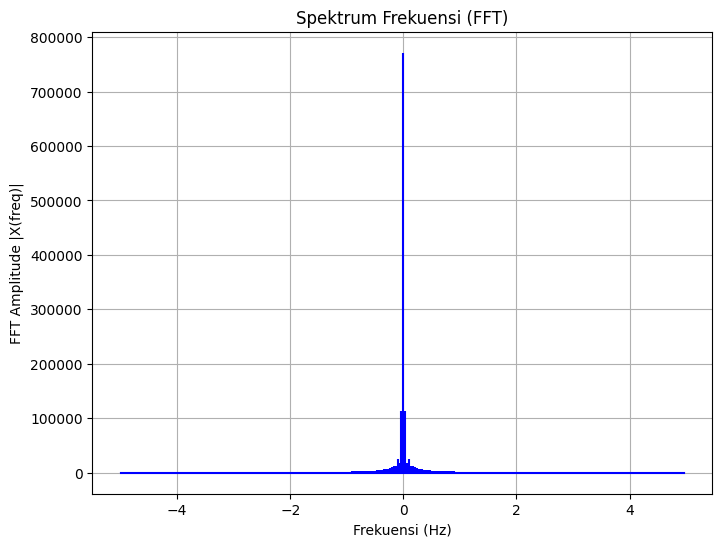

In [17]:
N = len(sensor_F1)
T = 30 / N
freq = np.fft.fftfreq(N, T)
fft_of_x = np.fft.fft(sensor_F1)

plt.figure(figsize=(8, 6))
plt.stem(freq, np.abs(fft_of_x), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('Spektrum Frekuensi (FFT)')
plt.grid()
plt.show()

Data Asli

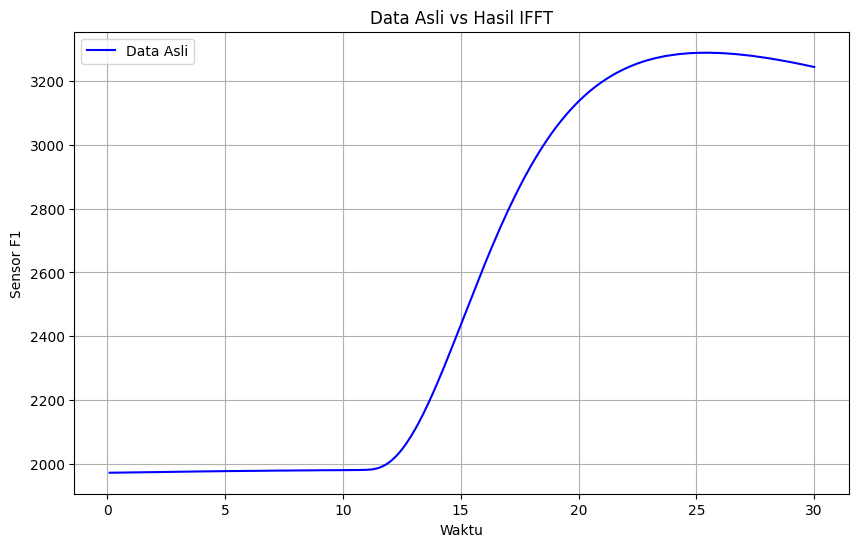

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(time, sensor_F1, label='Data Asli', color='blue')

plt.xlabel('Waktu')
plt.ylabel('Sensor F1')
plt.title('Data Asli vs Hasil IFFT')
plt.legend()
plt.grid()
plt.show()

IFFT

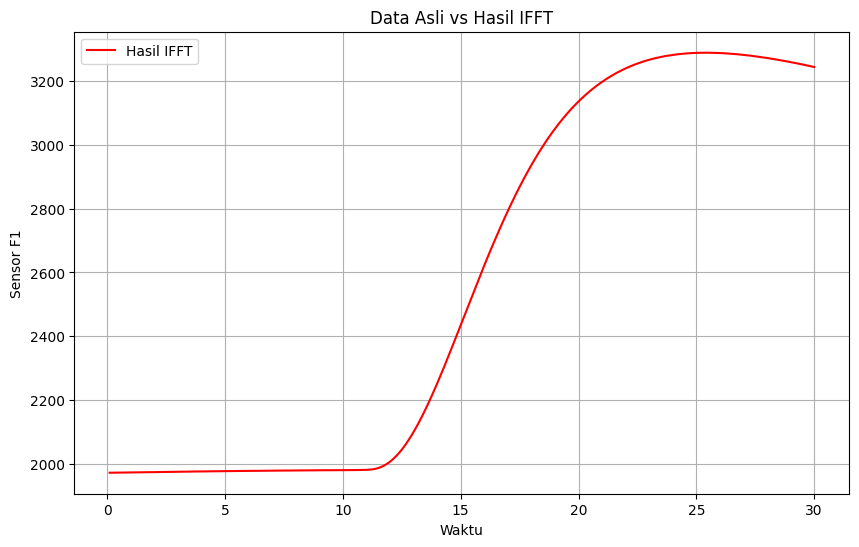

In [19]:
ifft_result = np.fft.ifft(fft_of_x)

plt.figure(figsize=(10, 6))
plt.plot(time, np.real(ifft_result), label='Hasil IFFT', color='red')
plt.xlabel('Waktu')
plt.ylabel('Sensor F1')
plt.title('Data Asli vs Hasil IFFT')
plt.legend()
plt.grid()
plt.show()

**Analisis:**

1. **Kualitas Model Frekuensi:** Kesamaan antara data asli dan hasil IFFT menunjukkan bahwa model frekuensi yang dihasilkan dari analisis FFT sangat cocok dengan data asli. Model ini mampu merekonstruksi data asli dengan baik.

2. **Frekuensi Dominan:** Model frekuensi yang dihasilkan dari analisis FFT memungkinkan untuk merekonstruksi komponen frekuensi yang mendominasi data asli. Ini adalah frekuensi dominan dalam data sensor F1.

3. **Pemahaman Data:** Hasil ini memberikan pemahaman yang kuat tentang sifat frekuensi data sensor dan memvalidasi bahwa analisis frekuensi yang dilakukan sesuai dengan data asli.

**Kesimpulan:**

Berdasarkan hasil ini, dapat disimpulkan bahwa metode FFT yang digunakan untuk menganalisis data sensor F1 berhasil dalam mengidentifikasi dan merekonstruksi frekuensi dominan dalam data. Ini merupakan alat yang efektif untuk menganalisis sifat frekuensi data sensor dan memberikan pemahaman yang baik tentang komponen frekuensi yang ada.

Hasil identik antara data asli dan hasil IFFT menunjukkan bahwa tidak ada kerugian informasi signifikan dalam proses analisis dan rekonstruksi. Oleh karena itu, data asli dapat dengan akurat direpresentasikan oleh model frekuensi yang dihasilkan melalui analisis FFT.

Sebagai kesimpulan, metode FFT yang digunakan dalam 4(a) adalah efektif dalam analisis frekuensi data sensor F1 dan mampu merekonstruksi data asli dengan baik, mendukung pemahaman data dan pengambilan keputusan yang lebih baik.

# Kesimpulan

Berdasarkan pemodelan dengan polinomial dan teknik Fourier yang telah dilakukan, berikut adalah analisis dan usulan untuk meningkatkan akurasi model:

**Pemodelan dengan Polinomial (3 Suku):**
1. **Analisis Polinomial (3 Suku):** Model polinomial dengan 3 suku digunakan untuk memodelkan respon sensor F1 terhadap Gas 1. Model ini mungkin cocok dengan data sensor F1, tetapi sebaiknya dilakukan analisis lebih lanjut untuk mengukur sejauh mana model ini sesuai dengan data asli.

2. **MSE dan R^2 Score:** Hasil analisis termasuk Mean Squared Error (MSE) dan R-squared (R^2) score. MSE yang lebih rendah dan R^2 yang lebih tinggi menunjukkan model yang lebih akurat.

3. **Usulan untuk Meningkatkan Akurasi:** Jika model polinomial dengan 3 suku tidak cukup akurat, pertimbangkan untuk mencoba model polinomial dengan suku yang lebih tinggi (4, 5, 6, dll.) dan periksa apakah peningkatan dalam tingkat polinomial tersebut meningkatkan akurasi model.

**Teknik Fourier:**
1. **Analisis Fourier:** Teknik Fourier digunakan untuk menganalisis komponen frekuensi dalam data sensor F1. Hal ini membantu dalam mengidentifikasi frekuensi dominan yang ada dalam data.

2. **Transformasi Balik:** Hasil FFT diubah kembali (IFFT) ke domain waktu dan dibandingkan dengan data asli. Identiknya hasil IFFT dan data asli menunjukkan bahwa analisis frekuensi dengan FFT adalah akurat.

3. **Usulan untuk Meningkatkan Akurasi:** Jika hasil FFT menunjukkan frekuensi dominan yang relevan, pertimbangkan untuk mengembangkan lebih lanjut analisis data dalam domain frekuensi tersebut.

**Kesimpulan Umum:**
- Kombinasi antara analisis polinomial dan teknik Fourier dapat memberikan pemahaman yang lebih mendalam tentang data sensor dan komponen frekuensi yang relevan.
- Meningkatkan akurasi model dapat melibatkan eksplorasi model matematis yang lebih kompleks, termasuk polinomial dengan derajat yang lebih tinggi, atau teknik statistik yang lebih canggih.

Penting untuk selalu memahami konteks dan aplikasi data sensor yang dianalisis, karena hal ini akan memengaruhi pilihan model dan teknik yang paling sesuai. Analisis yang cermat dan eksplorasi lebih lanjut dapat membantu dalam meningkatkan akurasi model dan memahami data dengan lebih baik.